**Up-Sampling이란?**

Up sampling은 디코딩시 복원하기 위해서 data의 크기를 늘리는 처리 과정

**Down-Sampling이란?**

Down sampling이란 하나의 영상 또는 사진을 더 작은 표본들로 표현하는 과정을 말한다.

**세그멘테이션(Segmentation)**

이미지에서 픽셀단위로 관심 객체를 추출하는 방법. 이미지에서 개체가 있는 위치, 해당 개체의 모양, 어떤 픽셀이 어떤 객체에 속하는지 등을 알고 싶다고 가정할 때, 이미지를 분할해 이미지의 각 픽셀에 레이블을 부여하는 것이다.

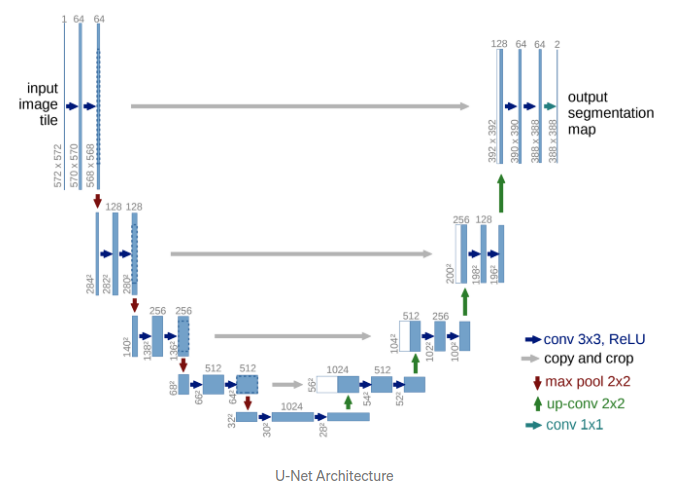

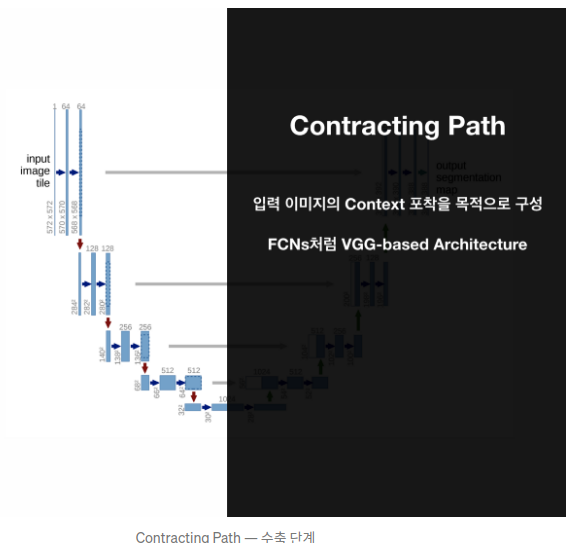

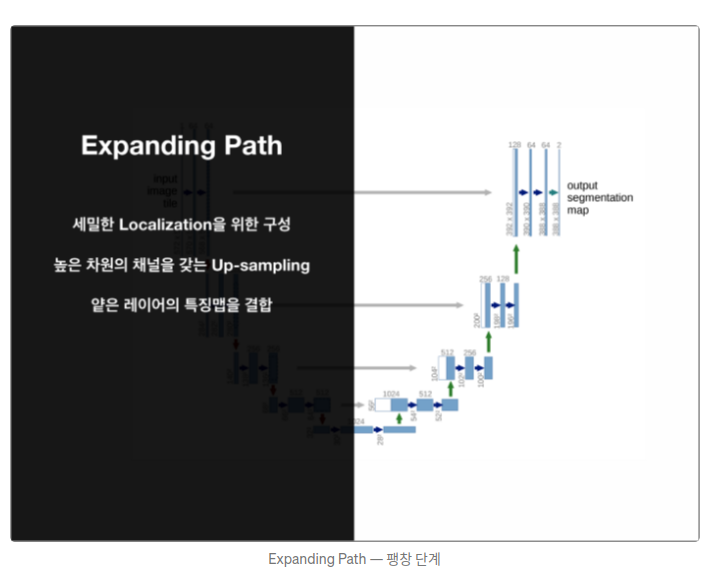

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import os

In [4]:
# Defining global constants

PATH_TO_DATA = "/content/drive/MyDrive/Colab Notebooks/archive"

# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256
OUTPUT_CHANNELS = 3

NUM_OF_DATA = len(glob.glob(os.path.join(PATH_TO_DATA, "trainA/*")))
NUM_OF_DATA_TEST = len(glob.glob(os.path.join(PATH_TO_DATA, "testA/*")))
NUM_OF_DATA, NUM_OF_DATA_TEST

(400, 106)

In [5]:
# Defining tools to load train/test data

def read_input_and_real_image(index: int, is_test=False):
    if is_test:
        path_real = f"testA/{index}.jpg"
        path_input = f"testB/{index}.jpg"
    else:
        path_real = f"trainA/{index}_A.jpg"
        path_input = f"trainB/{index}_B.jpg"
    train_real_path = os.path.join(PATH_TO_DATA, path_real)
    train_input_path = os.path.join(PATH_TO_DATA, path_input)
    
    train_real = tf.io.read_file(train_real_path)
    train_real = tf.io.decode_jpeg(train_real)
    
    train_input = tf.io.read_file(train_input_path)
    train_input = tf.io.decode_jpeg(train_input)
    return train_input, train_real

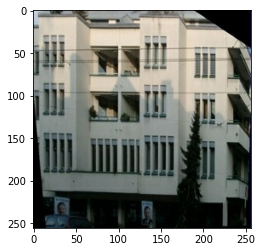

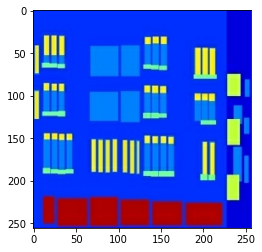

In [6]:
single_input, single_real = read_input_and_real_image(1)
plt.figure()
plt.imshow(single_real)
plt.figure()
plt.imshow(single_input)